Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(4077, 31)
               Time           V1           V2           V3           V4  \
count   4077.000000  4077.000000  4077.000000  4077.000000  4077.000000   
mean   25573.987246    -0.229967     0.024402     0.723000     0.163074   
std    12850.401797     1.754020     1.485760     1.387459     1.383618   
min        1.000000   -24.590245   -15.295396   -26.278701    -5.172595   
25%    14456.000000    -1.001611    -0.567040     0.212344    -0.735664   
50%    30754.000000    -0.263081     0.094041     0.810828     0.158179   
75%    35987.000000     1.156804     0.766978     1.450645     1.058657   
max    40386.000000     1.615664    14.044567     3.790692    11.270352   

                V5           V6           V7    

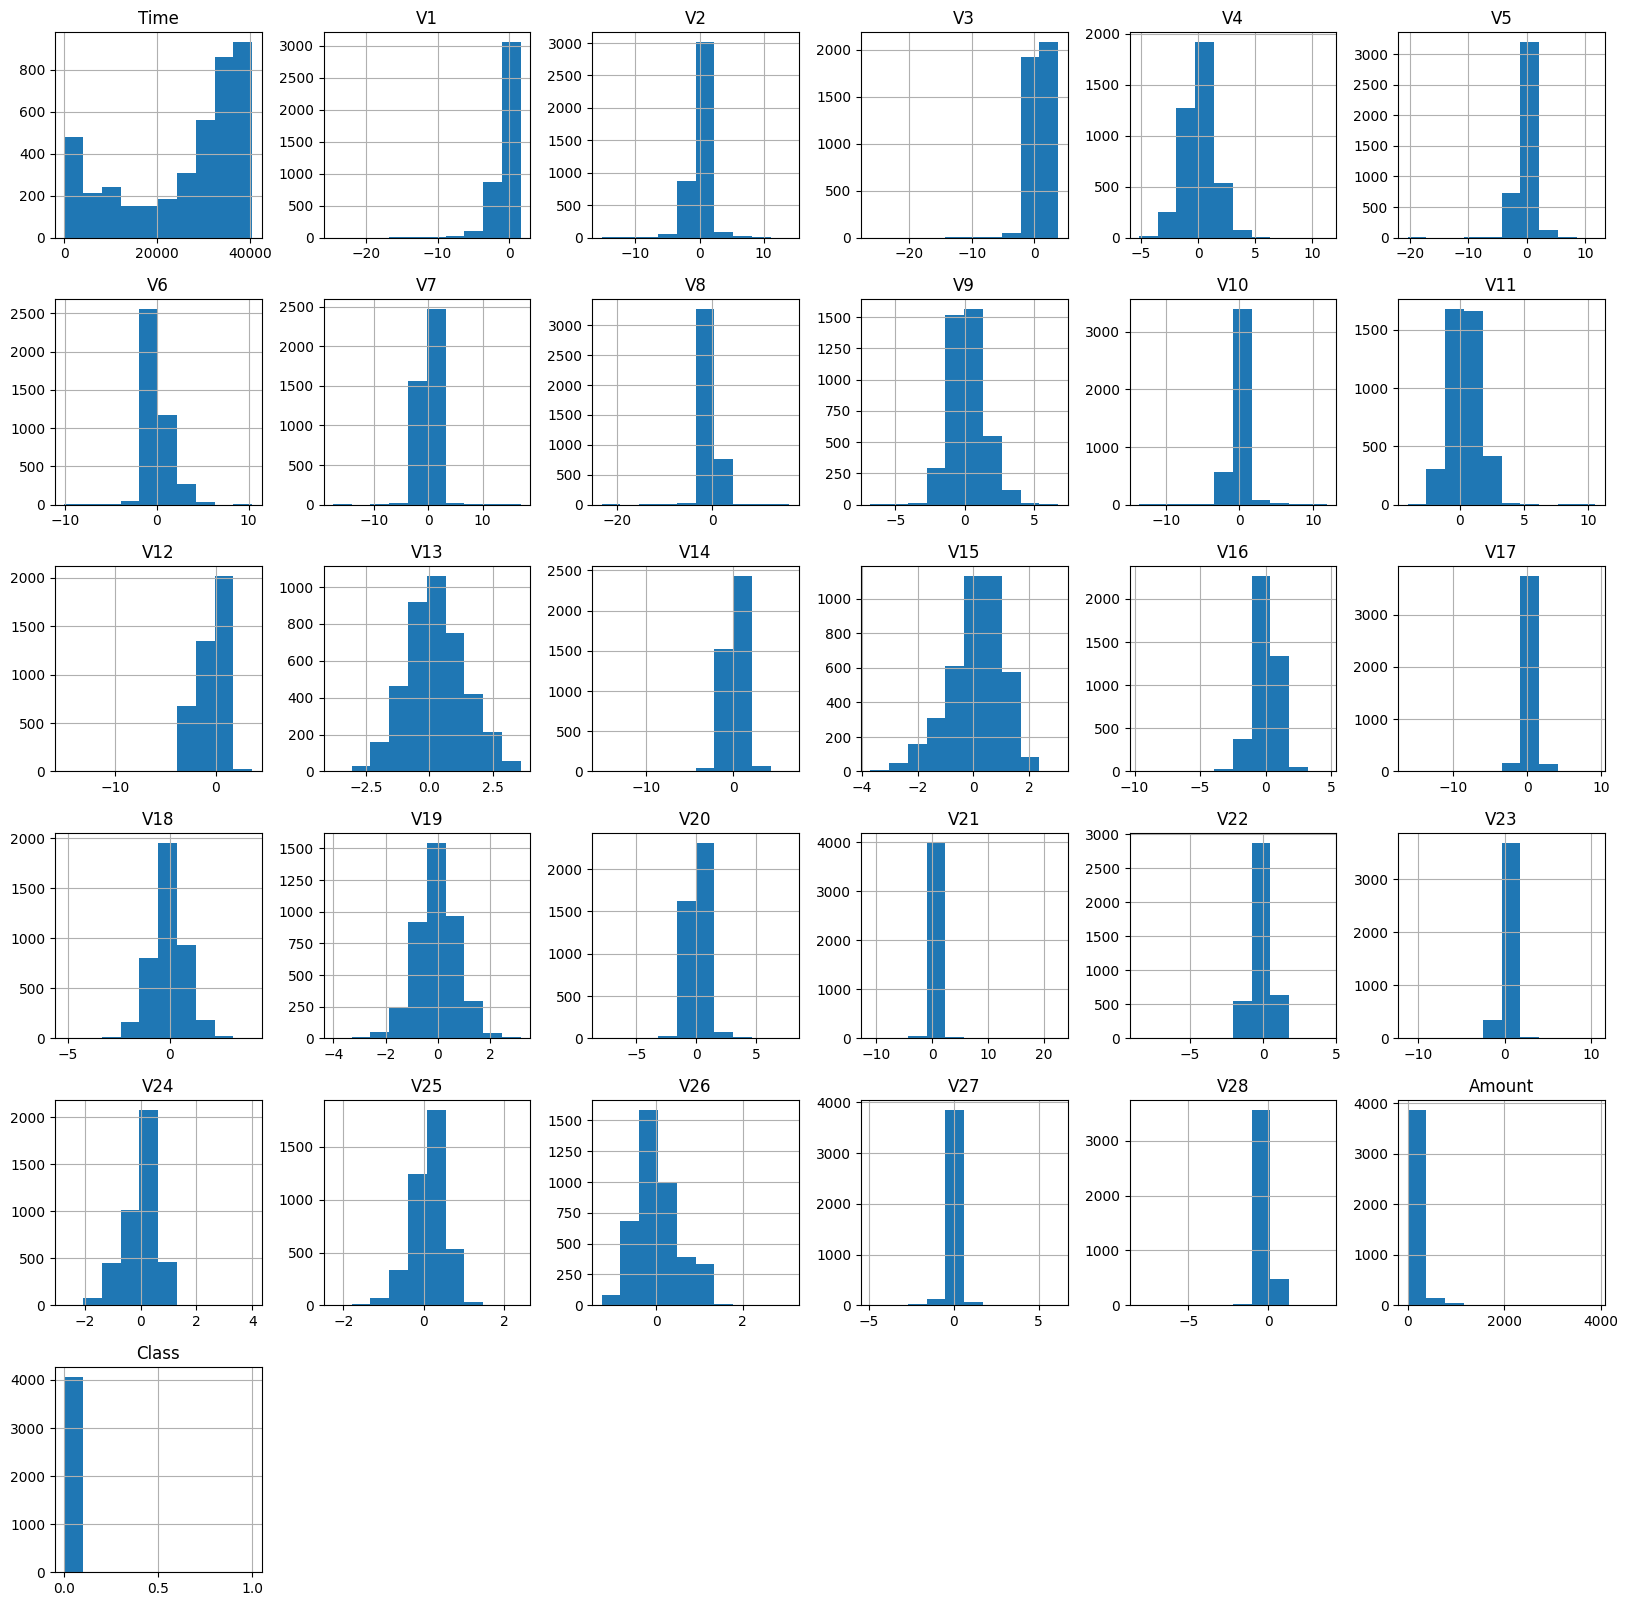

0.0024588148512417014
Fraud Cases: 10
Valid Transactions: 4067


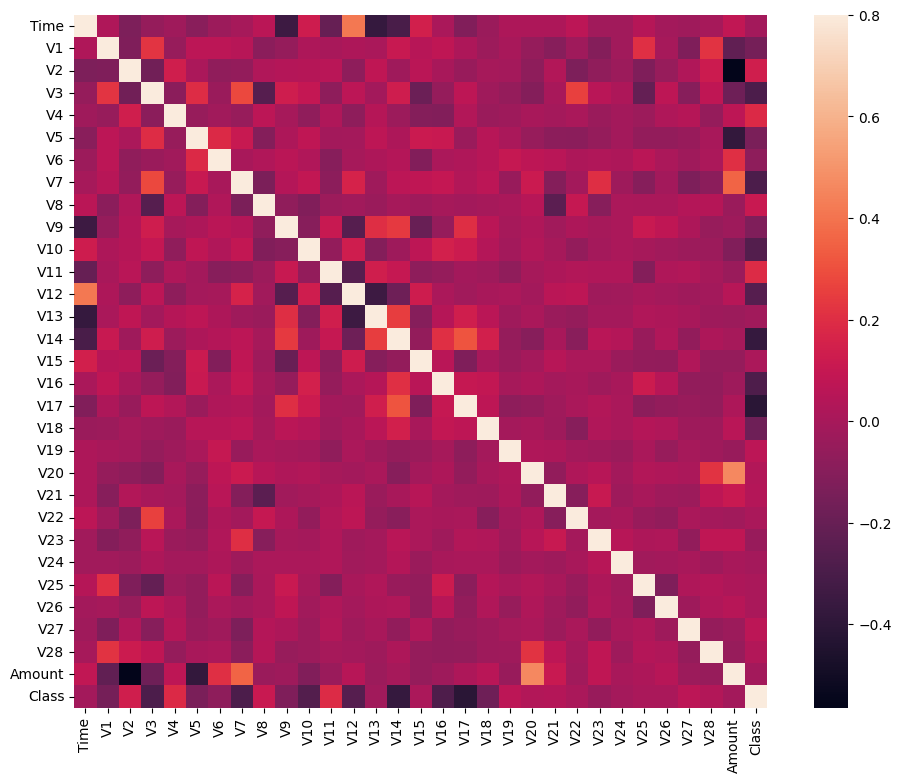

(4077, 30)
(4077,)
Isolation Forest: 15
0.9963208241353937
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4067
         1.0       0.27      0.30      0.29        10

    accuracy                           1.00      4077
   macro avg       0.64      0.65      0.64      4077
weighted avg       1.00      1.00      1.00      4077

Local Outlier Factor: 21
0.9948491537895512
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4067
         1.0       0.00      0.00      0.00        10

    accuracy                           0.99      4077
   macro avg       0.50      0.50      0.50      4077
weighted avg       1.00      0.99      0.99      4077



<Figure size 900x700 with 0 Axes>

In [ ]:
# import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

# load the dataset using pandas
data = pd.read_csv(r'/content/drive/MyDrive/credit card fraud detection/fraud detection.csv')

# dataset exploring
print(data.columns)

# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

# Plot histograms of each parameter
data.hist(figsize = (20, 20))
plt.show()

# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for valid, 1 for fraud.
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
